<a href="https://colab.research.google.com/github/alexanderjireland/ff-draft-optimizer/blob/main/ff_projections_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from ff_projections import *
import pandas as pd
import numpy as np

In [55]:
pm_train, pm_test  = read_in_data_for_projections('/content/projection_models_data_06_02.csv')

In [61]:
X_train, y_train, X_test, y_test = create_X_y_train_test(pm_train, pm_test)

In [57]:
#X_train, X_test = add_is_draftable_column(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.80
Precision: 0.82
Recall: 0.85
[[274  95]
 [ 78 426]]


In [62]:
import pymc as pm
import arviz as az
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score
import numpy as np
import pandas as pd

def logistic_regression_target_threshold(X_train, y_train, X_test, y_test, threshold=83.125):
    y_train_binary = y_train <= 83.125
    y_test_binary = y_test <= 83.125

    pipe = Pipeline([
        ('classifier', LogisticRegression())
    ])

    pipe.fit(X_train, y_train_binary)

    y_pred = pipe.predict(X_test)

    accuracy = accuracy_score(y_test_binary, y_pred)
    precision = precision_score(y_test_binary, y_pred)
    recall = recall_score(y_test_binary, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    print(confusion_matrix(y_test_binary, y_pred))

    return y_pred, y_train_binary.values.flatten()

def add_is_draftable_column(X_train, y_train, X_test, y_test, threshold=83.125):
    y_pred, y_train_binary = logistic_regression_target_threshold(X_train, y_train, X_test, y_test, threshold=threshold)
    X_test = pd.DataFrame(X_test, columns=[f'PC{i+1}' for i in range(X_test.shape[1])])
    X_train = pd.DataFrame(X_train, columns=[f'PC{i+1}' for i in range(X_train.shape[1])])

    X_test['is_draftable'] = y_pred.astype(int)
    X_train['is_draftable'] = y_train_binary.astype(int)

    return X_train, X_test

In [63]:
X_train_2, X_test_2 = add_is_draftable_column(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.80
Precision: 0.82
Recall: 0.85
[[274  95]
 [ 78 426]]


In [65]:
X_train_2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,is_draftable
0,9.475688,-10.088249,0.624865,-2.610533,-3.220282,-3.986500,0.783170,3.954053,3.383463,2.663791,...,0.185993,0.398151,0.196089,0.530792,0.670576,0.534828,0.294403,0.535970,-0.422818,1
1,2.800609,-7.233682,-0.056995,-2.435936,-3.817603,-4.327741,0.271631,11.914106,13.641517,-1.667689,...,-0.138104,-1.097372,0.928257,-1.006881,0.156790,0.347896,-0.441157,0.007397,1.307108,1
2,-3.761726,-5.834699,1.118555,-3.441769,-0.274794,0.027603,0.554245,2.551969,3.177563,0.589236,...,-1.088027,-1.216613,1.106363,0.079558,-0.937733,1.589187,1.216792,0.271518,0.990655,1
3,-3.914142,1.014979,0.393451,-3.745190,4.474576,0.432526,-4.914718,-2.487856,4.441510,0.058022,...,-0.062939,-2.326972,0.165947,-0.395043,0.328888,0.505812,0.079007,-1.030180,0.189911,1
4,-4.921712,0.723429,0.989380,2.878208,2.679407,-0.169355,-3.306419,5.715715,3.216323,7.255446,...,0.349398,0.372476,-0.803429,-0.195100,0.837195,0.837707,0.493000,0.209837,-0.549225,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,-3.734078,-6.450566,3.430637,-0.434324,1.514365,0.061339,0.005041,-0.114639,-1.519926,1.002046,...,-0.109088,0.892798,-0.009540,0.827816,0.796352,-0.730191,0.220600,-0.382878,-0.154739,1
10104,-2.034049,-3.909514,2.779602,-3.487284,1.892764,0.469248,-0.916454,-3.316172,-1.535194,-1.789821,...,-0.000904,0.453523,-0.208643,0.513001,-0.274147,-0.280659,0.226277,0.238485,-0.303747,1
10105,0.523356,2.877748,1.219223,-4.232091,0.475050,-0.810429,-1.262027,-8.175176,-4.840053,-8.341077,...,-0.665984,-1.661762,-0.857893,1.291272,-0.337357,0.053103,-0.017050,1.229752,0.504411,1
10106,-4.174925,-7.136883,2.480524,-2.908999,0.491893,-0.166634,0.380654,0.793758,1.222684,0.393286,...,0.649379,1.691082,0.294923,2.292196,0.431795,-0.299395,-0.516221,-0.943285,0.603219,0


In [68]:
def run_pm_model(X_train, y_train):

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    coef_mean = lr.coef_
    if len(coef_mean.shape) > 1:
        coef_mean = coef_mean.flatten()
    intercept_mean = lr.intercept_
    residuals = y_train - lr.predict(X_train)
    sigma_est = residuals.std()

    print(f"Mean of coefficients: {coef_mean}")
    print(f"Mean of intercept: {intercept_mean}")
    print(f"Standard deviation of residuals: {sigma_est}")

    df = pd.DataFrame(X_train)
    df["target"] = y_train.values

    df_clean = df.dropna()

    X_pm_train = df_clean.drop("target", axis=1).values
    y_pm_train = df_clean["target"].values

    feature_names = df_clean.drop("target", axis=1).columns.tolist()

    with pm.Model(coords={"features": feature_names}) as model:
        X_data = pm.Data("X_data", X_pm_train, dims=("obs", "features"))
        y_data = pm.Data("y_data", y_pm_train, dims="obs")

        intercept = pm.Normal("intercept", mu=intercept_mean, sigma=5)
        betas = pm.Normal("betas", mu=coef_mean, sigma=1.0, dims="features")
        sigma = pm.HalfNormal("sigma", sigma=sigma_est)

        mu = intercept + pm.math.dot(X_data, betas)

        y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_data, dims="obs")

        trace = pm.sample(draws=2000, tune=2000, chains=4, cores=4, target_accept=0.95, random_seed=11)

    return trace

In [69]:
trace = run_pm_model(X_train_2, y_train)

Mean of coefficients: [ 1.07983072e+00  1.47647820e+00 -5.51825099e-01 -1.03588792e-01
 -8.19480955e-01 -2.25552696e-01  3.93817247e-01  3.98538614e-01
 -1.41487482e-01  2.51177569e-01  1.44456649e+00 -8.01971030e-01
 -9.85605432e-01  3.56598479e-01  3.01850868e-01  4.85750843e-01
 -3.09765119e-01  2.69531440e-01 -3.83735439e-01 -4.72657216e-01
 -2.60516357e-01 -3.35370134e-01 -3.80627162e-01 -6.16672015e-01
  1.09814743e-01 -1.93342725e-01 -7.15487957e-01 -4.91353427e-01
  8.94319704e-02  1.35742048e+00 -2.66299652e-01 -7.89286080e-01
 -3.24261233e-01  2.00185529e-01  7.84974774e-01 -8.19384309e-01
 -1.27721633e+00  1.48567618e-01 -3.31100684e-01  2.38019624e-01
 -8.26462391e-01  8.43177337e-01  2.61957434e-02 -2.36511216e-01
  3.46710070e-01 -1.29650112e-01  1.66476471e-01 -3.81121361e-01
 -1.64056722e-01 -5.27744123e-01  5.76462015e-02 -1.66239385e-01
 -3.29807148e-01 -8.07331781e-03 -1.65770351e-02  1.28650180e-01
  3.37716973e-01  6.65861385e-01 -9.26621586e-01  1.56729644e-01
 -9

Output()

In [71]:
import os
from google.colab import drive
drive.mount('/content/drive')
directory = "/content/drive/MyDrive/PyMC_Models"
os.makedirs(directory, exist_ok=True)

Mounted at /content/drive


In [72]:
save_trace_filepath = "/content/drive/MyDrive/PyMC_Models/model_test_py_file.nc"
az.to_netcdf(trace, save_trace_filepath)

'/content/drive/MyDrive/PyMC_Models/model_test_py_file.nc'

array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

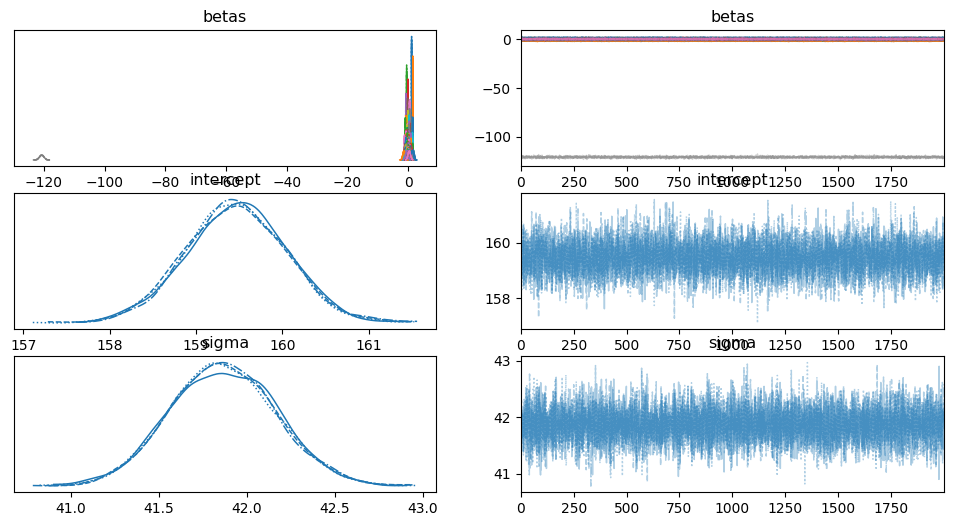

In [73]:
az.plot_trace(trace)

/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (130) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'betas\nPC1'}>,
        <Axes: title={'center': 'betas\nPC2'}>,
        <Axes: title={'center': 'betas\nPC3'}>,
        <Axes: title={'center': 'betas\nPC4'}>],
       [<Axes: title={'center': 'betas\nPC5'}>,
        <Axes: title={'center': 'betas\nPC6'}>,
        <Axes: title={'center': 'betas\nPC7'}>,
        <Axes: title={'center': 'betas\nPC8'}>],
       [<Axes: title={'center': 'betas\nPC9'}>,
        <Axes: title={'center': 'betas\nPC10'}>,
        <Axes: title={'center': 'betas\nPC11'}>,
        <Axes: title={'center': 'betas\nPC12'}>],
       [<Axes: title={'center': 'betas\nPC13'}>,
        <Axes: title={'center': 'betas\nPC14'}>,
        <Axes: title={'center': 'betas\nPC15'}>,
        <Axes: title={'center': 'betas\nPC16'}>],
       [<Axes: title={'center': 'betas\nPC17'}>,
        <Axes: title={'center': 'betas\nPC18'}>,
        <Axes: title={'center': 'betas\nPC19'}>,
        <Axes: title={'center': 'betas\nPC20'}>],
       [<Axes: title={'c

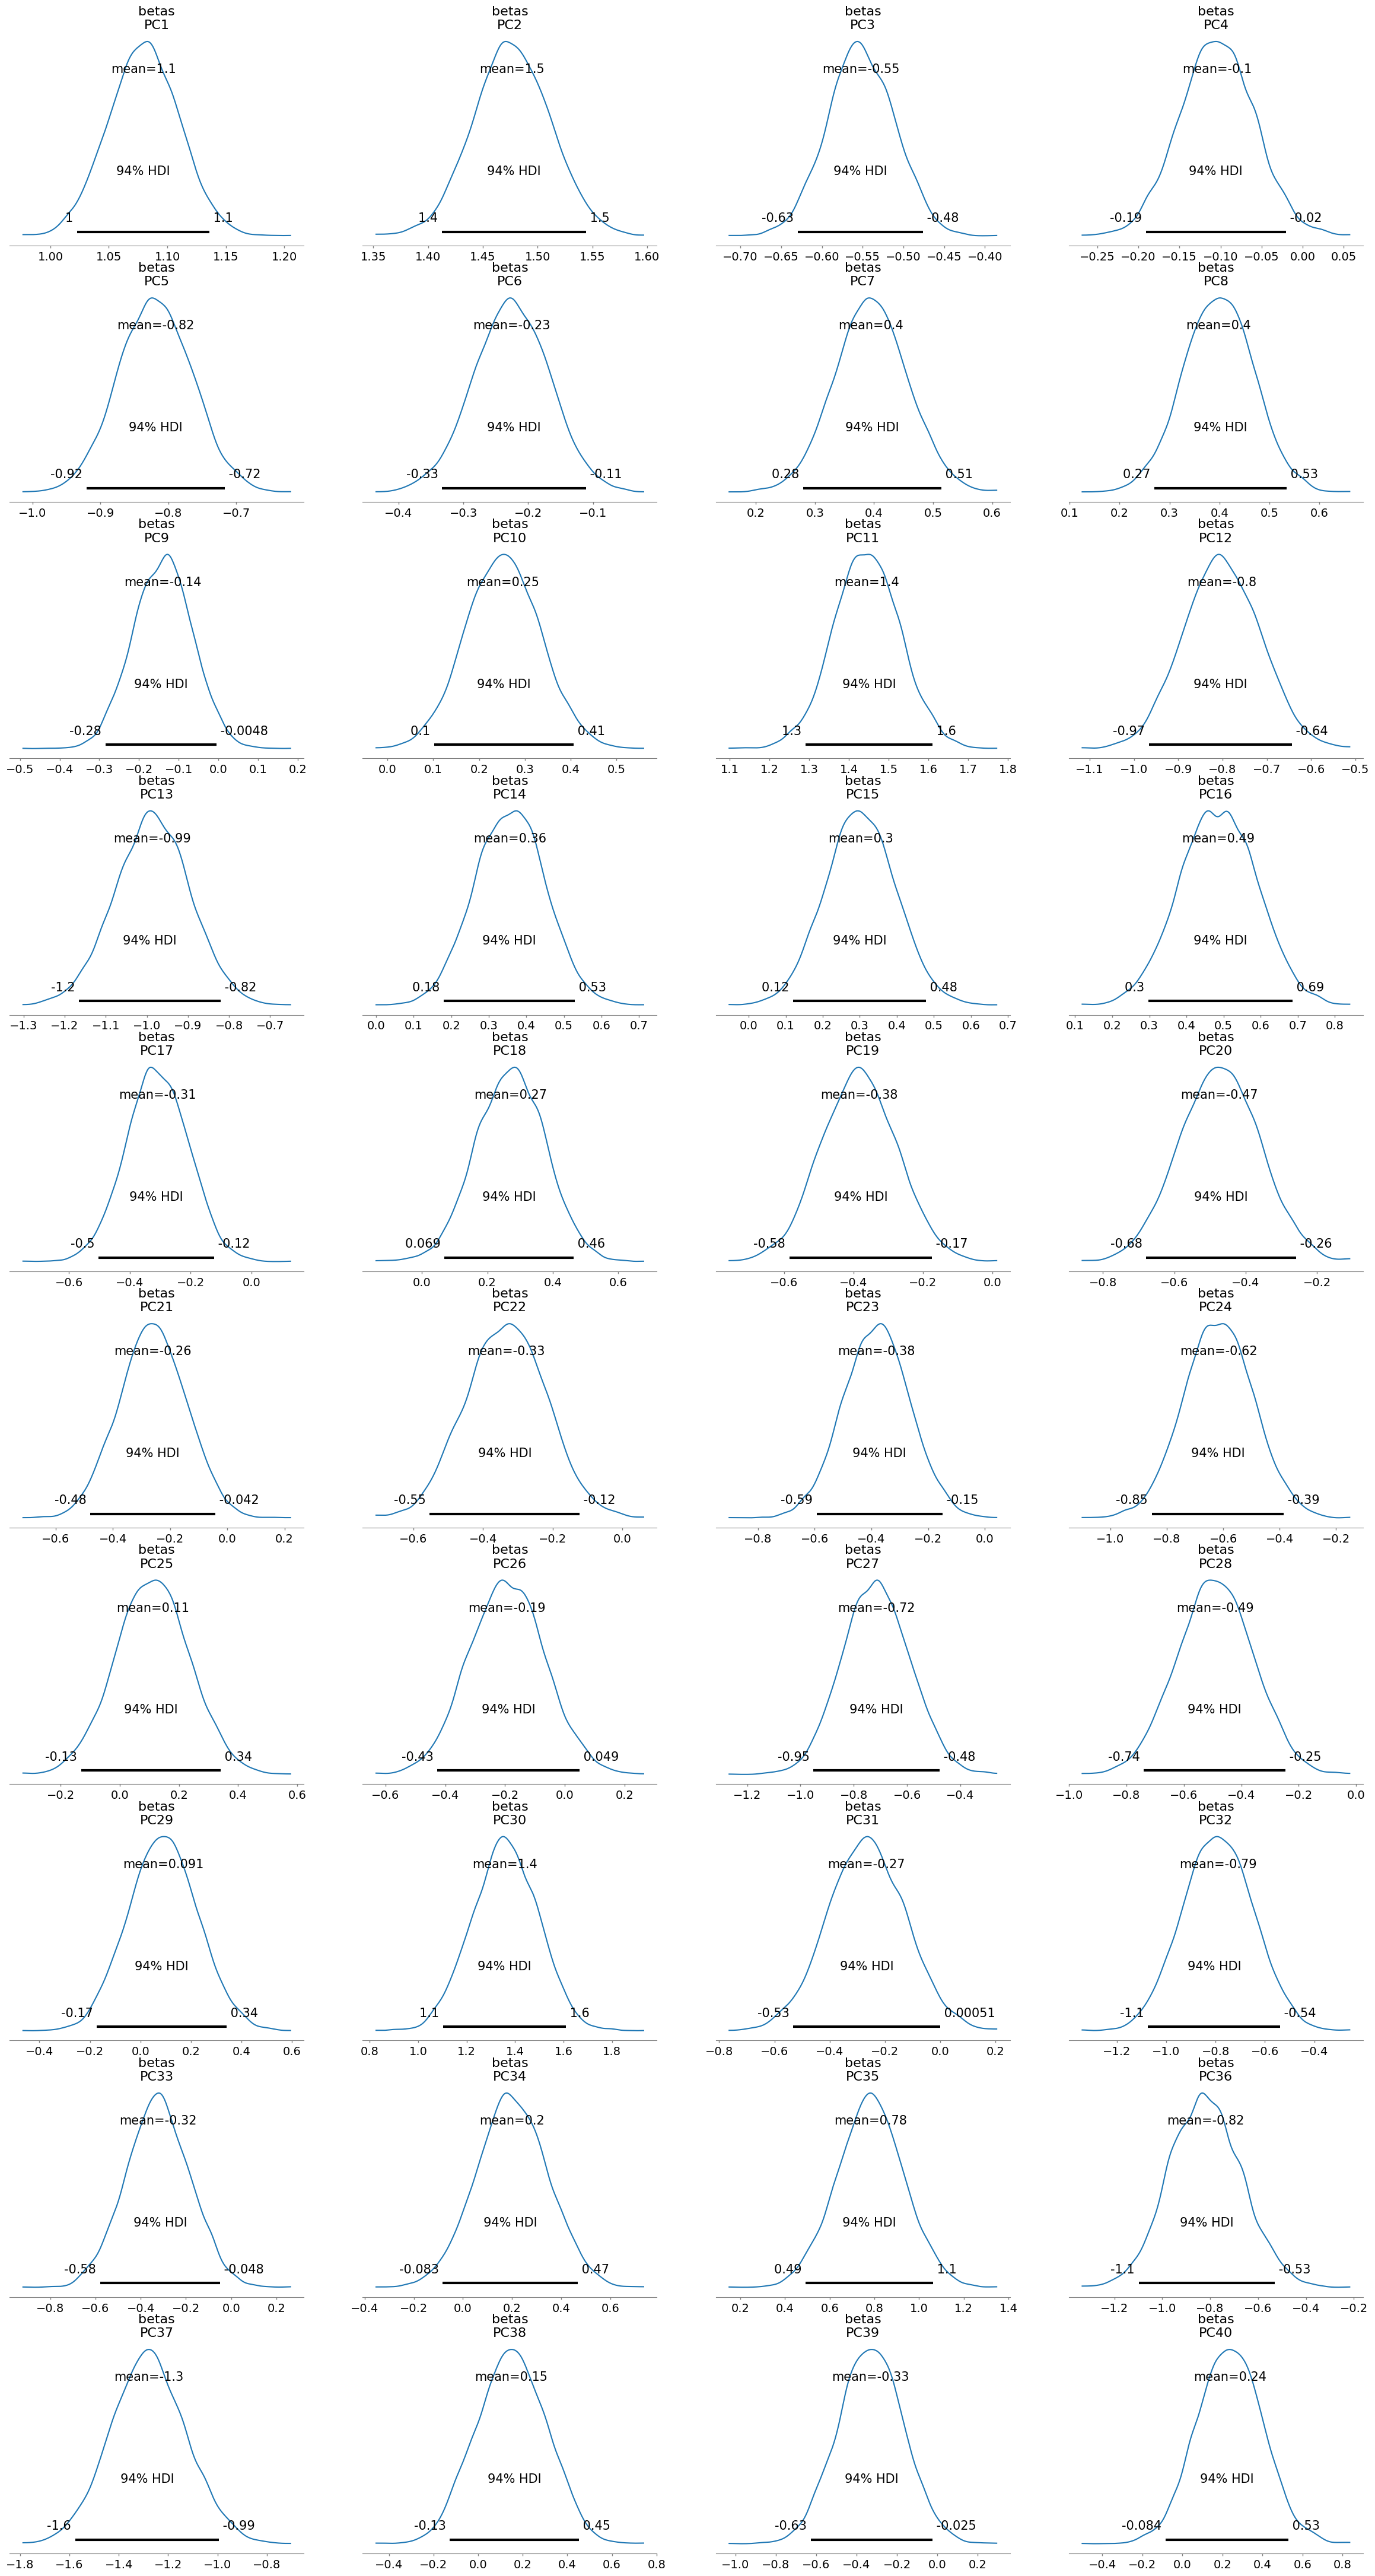

In [74]:
az.plot_posterior(trace)

In [75]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[PC1],1.080,0.030,1.023,1.136,0.000,0.000,14900.0,6279.0,1.0
betas[PC2],1.476,0.035,1.413,1.544,0.000,0.000,12994.0,5540.0,1.0
betas[PC3],-0.552,0.041,-0.630,-0.476,0.000,0.001,14629.0,5749.0,1.0
betas[PC4],-0.104,0.046,-0.191,-0.020,0.000,0.001,16363.0,5598.0,1.0
betas[PC5],-0.819,0.054,-0.920,-0.716,0.000,0.001,13755.0,5930.0,1.0
...,...,...,...,...,...,...,...,...,...
betas[PC126],0.266,0.393,-0.467,1.023,0.003,0.005,16708.0,6162.0,1.0
betas[PC127],0.300,0.394,-0.433,1.053,0.003,0.005,15756.0,5878.0,1.0
betas[is_draftable],-120.703,0.720,-121.980,-119.269,0.009,0.007,7017.0,6266.0,1.0
intercept[0],159.468,0.582,158.324,160.512,0.007,0.006,7232.0,6450.0,1.0


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_credible_interval(posterior_pred_samples, interval_size):
    begin = (100 - interval_size)/2
    return np.percentile(posterior_pred_samples, [begin, (100-begin)])

def predict_player(i, trace, X_test, y_test, plot=True):
    player_features = X_test.iloc[i]

    print(player_features)
    print(y_test.iloc[i])

    intercept_samples = trace.posterior["intercept"].values.flatten()
    betas_samples = trace.posterior["betas"].values
    sigma_samples = trace.posterior["sigma"].values.flatten()

    n_chains, n_draws, n_features = betas_samples.shape
    betas_samples = betas_samples.reshape(n_chains * n_draws, n_features)

    mu_samples = intercept_samples + np.dot(betas_samples, player_features)

    posterior_pred_samples = np.random.normal(mu_samples, sigma_samples)

    projected_median = np.median(posterior_pred_samples)
    credible_interval_95 = create_credible_interval(posterior_pred_samples, 95)
    credible_interval_90 = create_credible_interval(posterior_pred_samples, 90)
    credible_interval_85 = create_credible_interval(posterior_pred_samples, 85)
    credible_interval_75 = create_credible_interval(posterior_pred_samples, 75)
    credible_interval_50 = create_credible_interval(posterior_pred_samples, 50)
    prob_gt_200 = np.mean(posterior_pred_samples > 200)

    print(f"Projected season points (median): {projected_median:.1f}")
    print(f"95% credible interval: [{credible_interval_95[0]:.1f}, {credible_interval_95[1]:.1f}]")
    print(f"90% credible interval: [{credible_interval_90[0]:.1f}, {credible_interval_90[1]:.1f}]")
    print(f"85% credible interval: [{credible_interval_85[0]:.1f}, {credible_interval_85[1]:.1f}]")
    print(f"75% credible interval: [{credible_interval_75[0]:.1f}, {credible_interval_75[1]:.1f}]")
    print(f"50% credible interval: [{credible_interval_50[0]:.1f}, {credible_interval_50[1]:.1f}]")
    print(f"Probability points > 200: {prob_gt_200:.2%}")

    # Plot posterior predictive distribution
    if plot:
        plt.figure(figsize=(10, 6))
        sns.histplot(posterior_pred_samples, bins=50, kde=True, color="skyblue")
        plt.axvline(projected_median, color="red", linestyle="--", label=f"Median: {projected_median:.1f}")
        plt.axvline(200, color="green", linestyle=":", label="200-point threshold")
        plt.title(f"Posterior Predictive Distribution for Player {i}")
        plt.xlabel("Predicted Season Points")
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
        plt.show()

PC1             68.012084
PC2             -0.019538
PC3            -11.473354
PC4             13.070029
PC5             28.089067
                  ...    
PC124           -4.553537
PC125            1.381015
PC126           -2.239772
PC127           -2.095985
is_draftable     0.000000
Name: 0, Length: 128, dtype: float64
fantasy_pts    0.0
Name: 3865, dtype: float64
Projected season points (median): 214.6
95% credible interval: [130.6, 298.2]
90% credible interval: [144.1, 286.6]
85% credible interval: [152.5, 277.1]
75% credible interval: [164.2, 265.3]
50% credible interval: [185.4, 243.9]
Probability points > 200: 63.10%


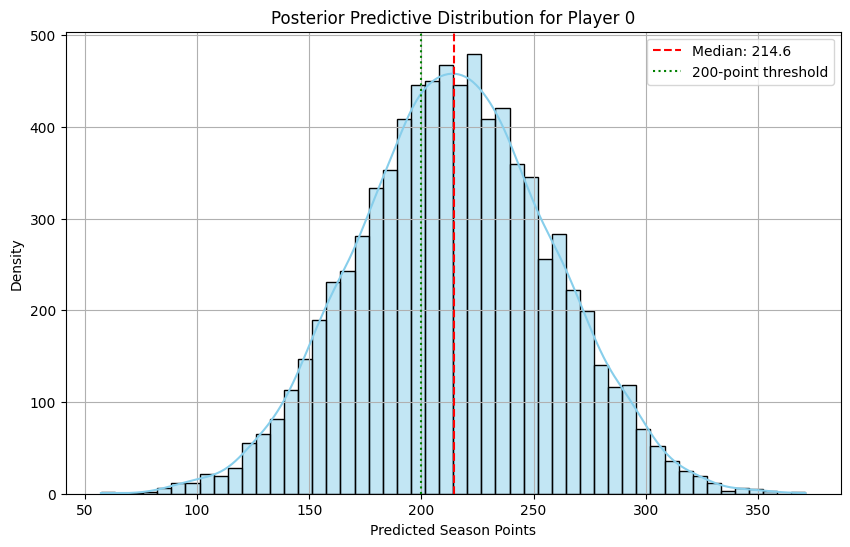

In [79]:
predict_player(0, trace, X_test_2, y_test)

PC1             42.406856
PC2             14.959529
PC3             -4.045227
PC4              9.648118
PC5             20.094513
                  ...    
PC124           -1.611975
PC125            2.265978
PC126           -0.021827
PC127            1.498882
is_draftable     0.000000
Name: 350, Length: 128, dtype: float64
fantasy_pts    257.36
Name: 9907, dtype: float64
Projected season points (median): 241.6
95% credible interval: [159.8, 324.9]
90% credible interval: [171.6, 309.8]
85% credible interval: [180.6, 302.3]
75% credible interval: [192.7, 290.4]
50% credible interval: [213.1, 270.0]
Probability points > 200: 83.21%


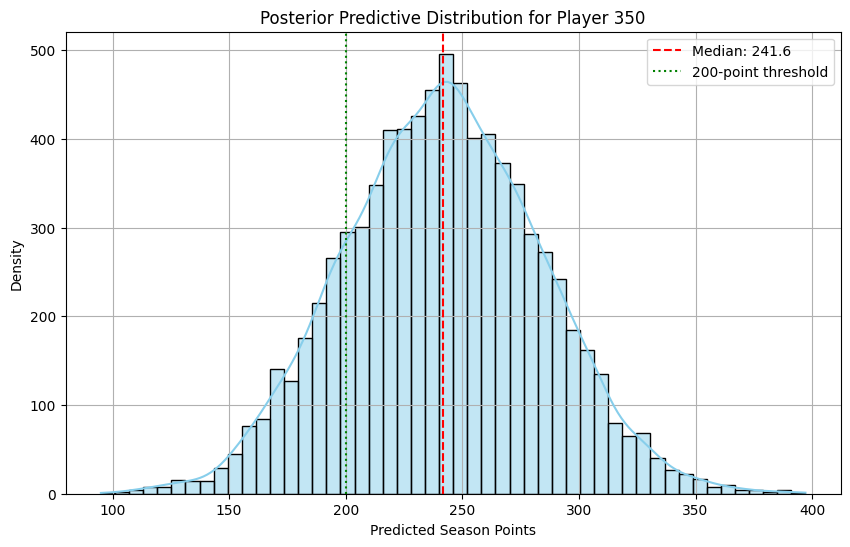

In [102]:
predict_player(350, trace, X_test_2, y_test)

PC1            -3.137998
PC2            -7.033113
PC3             3.355811
PC4            -3.169468
PC5             0.239233
                  ...   
PC124          -0.190686
PC125          -0.003436
PC126           0.298369
PC127          -0.163532
is_draftable    1.000000
Name: 691, Length: 128, dtype: float64
fantasy_pts    284.4
Name: 10758, dtype: float64
Projected season points (median): 21.0
95% credible interval: [-63.5, 100.1]
90% credible interval: [-51.0, 87.3]
85% credible interval: [-41.6, 79.5]
75% credible interval: [-28.8, 68.1]
50% credible interval: [-7.7, 49.1]
Probability points > 200: 0.00%


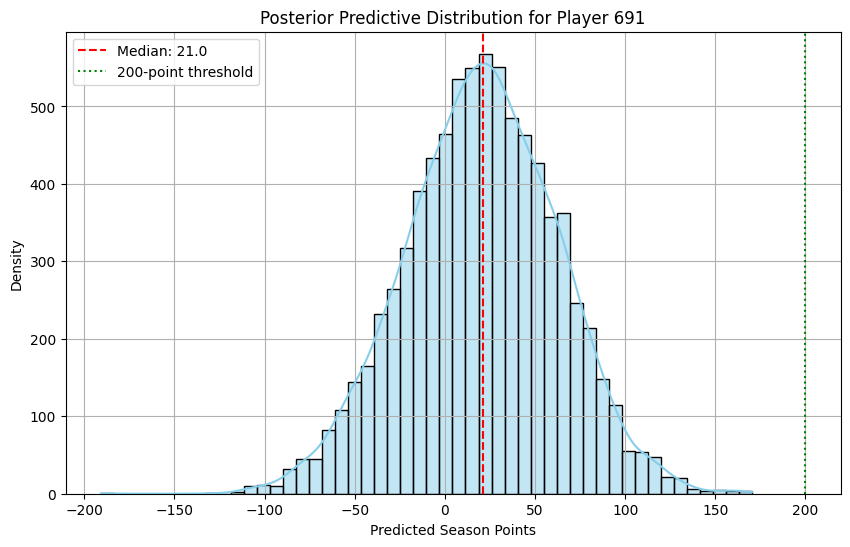

In [103]:
predict_player(691, trace, X_test_2, y_test)

In [86]:
pm_test = pm_test.reset_index(drop=True)

In [100]:
pm_test.sample(20)

,season,gsis_id,full_name_all_players,fantasy_pts,ff_pts_prev_year,years_exp,Rank,ESPN,AVG,position_rank,...,significant_injury_prev_season,cum_player_mean_prev_season,cum_player_std_prev_season,cum_player_min_prev_season,cum_player_noninjured_min_prev_season,cum_player_max_prev_season,position_QB,position_RB,position_TE,position_WR
508,2023,00-0034753,Mark Andrews,135.40,190.50,5.0,29.0,36.0,30.3,2.0,...,1.0,191.920000,64.184632,107.20,NaN,284.60,False,False,True,False
671,2024,00-0038951,Sean Tucker,67.10,5.20,1.0,620.0,NaN,469.0,150.0,...,0.0,5.200000,NaN,5.20,5.20,5.20,False,True,False,False
619,2023,00-0038122,Desmond Ridder,161.50,22.86,1.0,262.0,NaN,250.0,32.0,...,0.0,22.860000,NaN,22.86,22.86,22.86,True,False,False,False
655,2024,00-0039021,Roschon Johnson,70.50,100.10,1.0,253.0,NaN,244.3,67.0,...,0.0,100.100000,NaN,100.10,100.10,100.10,False,True,False,False
376,2024,00-0036331,Devin Duvernay,19.20,7.30,4.0,667.0,NaN,505.0,215.0,...,0.0,60.375000,43.749848,7.30,7.30,110.10,False,False,False,True
116,2023,00-0033923,Kareem Hunt,117.00,121.00,6.0,204.0,234.0,212.5,56.0,...,0.0,179.350000,79.822046,101.40,101.40,295.20,False,True,False,False
569,2024,00-0037327,Skylar Thompson,7.88,11.08,2.0,442.0,303.0,505.5,58.0,...,0.0,11.080000,NaN,11.08,11.08,11.08,True,False,False,False
412,2024,00-0035993,Tyler Huntley,51.98,11.78,4.0,746.0,NaN,633.0,110.0,...,0.0,35.100000,33.991218,2.80,2.80,75.80,True,False,False,False
401,2024,00-0036345,K.J. Osborn,18.70,117.10,4.0,338.0,NaN,315.5,111.0,...,0.0,101.350000,68.892888,0.00,0.00,149.40,False,False,False,True
350,2024,00-0036355,Justin Herbert,257.36,234.16,4.0,127.0,127.0,130.8,17.0,...,1.0,295.695000,56.554246,234.16,NaN,353.34,True,False,False,False
